<a href="https://colab.research.google.com/github/AgustinSiben/AprMaq/blob/main/Trabajo_practico_3_AM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo práctico 3 - Ejericio 3.1

## Creo un grupo de datos de dos dimenciones

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

#Creo dos dataframes de con forma de función gaussiana
muA, sigmaA = 5,10 # Media y desviación estandar
muB, sigmaB = 5,10
n = 100 #Cantidad de valores
a = np.random.normal(muA, sigmaA, n)
b = np.random.normal(muB, sigmaB, n)

df1 = pd.DataFrame({'feature0' : a, 'feature1': b,'Etiq.': 0})
df1



,feature0,feature1,Etiq.
0,11.809002,-1.970385,0
1,4.555705,10.744318,0
2,10.280361,-5.234038,0
3,2.735011,-14.616430,0
4,24.322572,2.872243,0
...,...,...,...
95,-4.024824,9.539041,0
96,5.733618,-14.261524,0
97,5.443319,11.128310,0
98,12.385029,2.443518,0


##Creo el segundo grupo de datos

In [ ]:
#Realizó lo mismo pero con otras caracteristicas
muA, sigmaA = 30, 10 # Media y desviación estandar
muB, sigmaB = 30,10
n = 100 #Cantidad de valores
a = np.random.normal(muA, sigmaA, n)
b = np.random.normal(muB, sigmaB, n)

df2 = pd.DataFrame({'feature0' : a, 'feature1': b,'Etiq.': 1})
df2

,feature0,feature1,Etiq.
0,22.404118,19.828797,1
1,33.123534,45.989783,1
2,17.516878,32.283736,1
3,27.432595,19.948030,1
4,43.003630,22.702099,1
...,...,...,...
95,32.299509,33.695262,1
96,32.662003,30.386882,1
97,29.169906,29.841652,1
98,29.257636,36.738384,1


## Muestro los distintos grupos de datos

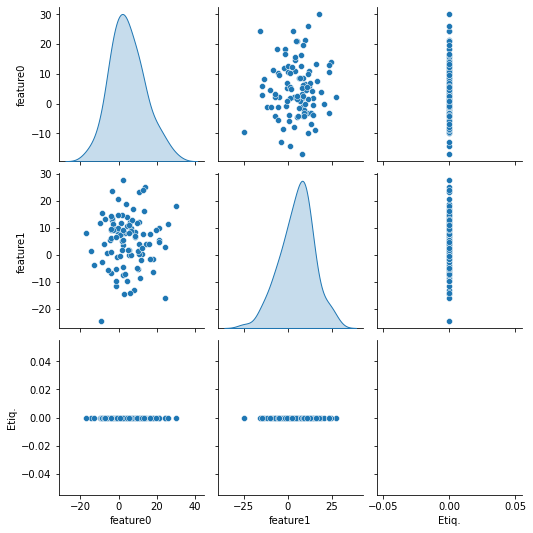

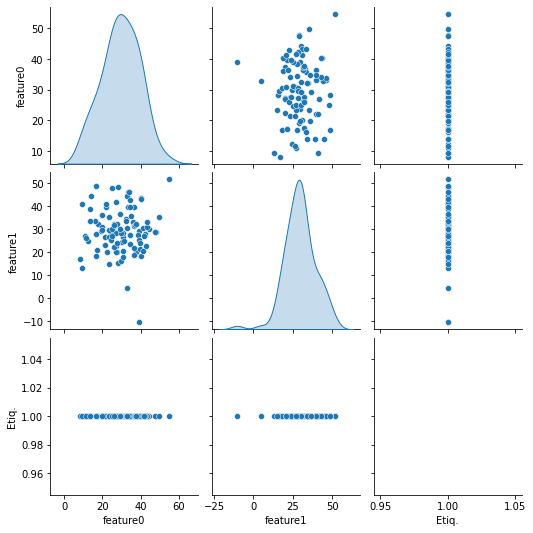

In [ ]:
import seaborn as sns

sns.pairplot(df1, diag_kind="kde")

sns.pairplot(df2, diag_kind="kde")

##Junto los gupos de datos

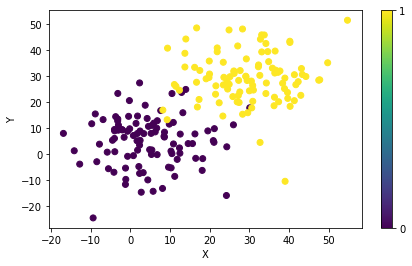

In [ ]:
df = df1.append(df2,ignore_index='true')
plt.figure(figsize=(7, 4))
plt.scatter(df['feature0'].values, df['feature1'].values, c = (df['Etiq.'].values))
plt.colorbar(ticks=[0, 1])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


##Creo el grupo de datos para entrenar el clasificador tomando 50 datos de cada grupo

In [ ]:
temp = df1.iloc[0:50]
temp = temp.append(df2.iloc[0:50])
#features
X = temp[['feature0','feature1']].values
#target
y = temp['Etiq.'].values
y = y.reshape(-1,1)

##Agrego un clasificador y le doy los datos X,y. Luego los uso para hacer las predicciones utilizando distintos valores de vecinos cercanos.

In [ ]:
from sklearn import neighbors

k = 10
knn = neighbors.KNeighborsClassifier(n_neighbors = k)
knn.fit(X , y.astype(int))

#Hago una predicción de prueba
resultado = knn.predict([[1, 11],[80,  80]])
print(resultado)



[0 1]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


##Utilizo todo el conjunto de datos y predigo la etiqueta

In [ ]:
temp = df1.append(df2,ignore_index='true')
#features
valX = temp[['feature0','feature1']].values
#target
valY = temp['Etiq.'].values
y = y.reshape(-1,1)

resultados = knn.predict(valX)
df['predicción'] = resultados
df

,feature0,feature1,Etiq.,predicción
0,11.809002,-1.970385,0,0
1,4.555705,10.744318,0,0
2,10.280361,-5.234038,0,0
3,2.735011,-14.616430,0,0
4,24.322572,2.872243,0,0
...,...,...,...,...
195,32.299509,33.695262,1,1
196,32.662003,30.386882,1,1
197,29.169906,29.841652,1,1
198,29.257636,36.738384,1,1


Compruebo errores y aciertos

In [ ]:
#Supongo 0 como negativo y 1 como positivo
tE = []
for i in range(200):
    if df.iloc[i,2] == 1 and df.iloc[i,3] == 1:
        tE.append('VP')
    elif df.iloc[i,2] == 0 and df.iloc[i,3] == 0:
        tE.append('VN')
    elif df.iloc[i,2] == 0 and df.iloc[i,3] == 1:
        tE.append('FP')
    elif df.iloc[i,2] == 1 and df.iloc[i,3] == 0:
        tE.append('FN')

df['Tipo de Error'] = tE

fp, fn, vp, vn = [np.sum(df['Tipo de Error'] == tE) for tE in ['FP', 'FN', 'VP', 'VN']]

TPR = vp/(vp+fn)
FPR = fp/(fp+vn)
PPV = vp/(vp+fp)
f = 2*TPR*PPV/(TPR+PPV)

print('TPR:', np.round(TPR, 2))
print('FPR:', np.round(TPR, 2))
print('PPV:', np.round(PPV, 2))
print('F:', np.round(f, 2))


df.sample(10)

TPR: 0.97
FPR: 0.97
PPV: 0.96
F: 0.97


,feature0,feature1,Etiq.,predicción,Tipo de Error
23,-0.723783,8.863136,0,0,VN
98,12.385029,2.443518,0,0,VN
162,27.080021,41.722819,1,1,VP
140,35.837608,33.174765,1,1,VP
92,9.618867,-4.971022,0,0,VN
89,4.853088,1.770040,0,0,VN
35,8.603032,8.505192,0,0,VN
87,-3.936594,0.986862,0,0,VN
56,5.897619,11.989556,0,0,VN
63,-8.481110,-2.869532,0,0,VN


# Trabajo práctico 3 - Ejericio 3.3


## Importo el dataset

In [389]:
import pandas as pd
attributes_spotify = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBOM/data/attributes_spotify.csv")
attributes_spotify.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [390]:
attributes_spotify.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


##Elimino columnas que no considero importantes a la hora de hacer la predicción. También separo el target de los datos para la predicción.

Considero de poca importancia el nombre de la canción y del artista, también la columna que tiene los indices duplicados.

In [391]:
del attributes_spotify['artist'], attributes_spotify['song_title'], attributes_spotify['Unnamed: 0']
attributes_spotify

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1
1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1
4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0
2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0
2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0
2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0


## Para entrenar el clasificador utilizo la mitad de los datos.

In [392]:
data = attributes_spotify.sample(1000)
y = data['target']
X = data.copy()
del X['target']

##Agrego un clasificador y le doy los datos X,y. Hago varias predicciones para encontar un valor de N vecinos adecuado.

Luego los uso los datos y el número de vecinos más cercanos para hacer las predicciones.

In [393]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV

knn = neighbors.KNeighborsClassifier()
#A los parámetros le agrego los valores de n con los que quiero hacer la grilla
params_grid = {'n_neighbors': [5*n for n in range(1, 21)]}
knn_grid = GridSearchCV(knn, params_grid, cv=10) #Utilizo 5 validaciones cruzadas
#Entreno el clasificador con todos los valores de n
knn_grid.fit(X,y)
#Obtengo la mejor clasificación
print('Mejor valor de N: ',knn_grid.best_params_)
print('Mejor performance: ',knn_grid.best_score_)
X

Mejor valor de N:  {'n_neighbors': 10}
Mejor performance:  0.6080000000000001


,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
1628,0.016800,0.737,368476,0.614,0.05340,6,0.0682,-6.001,0,0.4000,127.987,4.0,0.394
726,0.886000,0.574,217053,0.324,0.08170,0,0.2800,-10.993,1,0.0307,91.007,4.0,0.226
1515,0.922000,0.535,297653,0.107,0.64900,10,0.1050,-18.989,0,0.0323,102.186,4.0,0.159
1894,0.114000,0.483,219467,0.818,0.00000,11,0.3670,-7.666,1,0.0444,175.668,4.0,0.690
1853,0.009470,0.739,261933,0.947,0.00003,11,0.3260,-1.915,0,0.0412,88.009,4.0,0.762
...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,0.026100,0.556,260147,0.722,0.01630,9,0.1660,-9.541,1,0.0475,130.028,4.0,0.508
363,0.160000,0.746,179091,0.682,0.00000,7,0.1770,-6.353,1,0.1170,98.977,4.0,0.836
595,0.000117,0.857,222330,0.948,0.81600,10,0.3170,-6.901,0,0.2040,140.002,4.0,0.669
695,0.029600,0.907,849960,0.643,0.02650,1,0.1050,-8.657,0,0.0549,124.909,4.0,0.363


##Observando que las mejore performances suelen rondar los 0.6 decido quitar manualmente algunas de las columnas y observar resultados

Algunos parámetros que pueden no estar relacionados con los gustos de la canción pueden ser, el modo, el compás, la nota y la duración de la canción. Elimino estos parámetros y observo el resultado

In [394]:
del X['key'] ,X['time_signature'], X['mode'], X['duration_ms']
knn = neighbors.KNeighborsClassifier()
#A los parámetros le agrego los valores de n con los que quiero hacer la grilla
params_grid = {'n_neighbors': [5*n for n in range(1, 21)]}
knn_grid = GridSearchCV(knn, params_grid, cv=10) #Utilizo 5 validaciones cruzadas
#Entreno el clasificador con todos los valores de n
knn_grid.fit(X,y)
#Obtengo la mejor clasificación
print('Mejor valor de N: ',knn_grid.best_params_)
print('Mejor performance: ',knn_grid.best_score_)

Mejor valor de N:  {'n_neighbors': 50}
Mejor performance:  0.624


## Eliminando las columnas mejoró la predicción. Para mejorarlo aún más normalizo los parametros del dataset. Para esto utilizo una librería de sklearn

In [395]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_norm = pd.DataFrame(scaler.transform(X),columns=X.columns)
X_norm.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,-0.651430,0.712289,-0.360989,-0.294192,-0.788752,0.261915,3.481683,0.253073,-0.446896
1,2.813286,-0.296935,-1.787872,-0.191870,0.581682,-1.108653,-0.724258,-1.114061,-1.124114
2,2.956786,-0.538406,-2.855573,1.859279,-0.550641,-3.303978,-0.706035,-0.700779,-1.394195
3,-0.263982,-0.860367,0.642748,-0.487267,1.144608,-0.195215,-0.568229,2.015818,0.746297
4,-0.680648,0.724673,1.277465,-0.487159,0.879321,1.383739,-0.604674,-1.224896,1.036534


##Con los valores normalizados vuelvo a entrenar el clasificador

In [396]:
knn = neighbors.KNeighborsClassifier()
#A los parámetros le agrego los valores de n con los que quiero hacer la grilla
params_grid = {'n_neighbors': [5*n for n in range(1, 21)]}
knn_grid = GridSearchCV(knn, params_grid, cv=10) #Utilizo 5 validaciones cruzadas
#Entreno el clasificador con todos los valores de n
knn_grid.fit(X_norm,y)
#Obtengo la mejor clasificación
print('Mejor valor de N: ',knn_grid.best_params_)
print('Mejor performance: ',knn_grid.best_score_)

Mejor valor de N:  {'n_neighbors': 45}
Mejor performance:  0.705
